<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Display column names
print("Column Names:")
print(df.columns)

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display summary information
print("\nSummary Information:")
print(df.info())

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [29]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Remove columns like JobSat
cols_to_drop = df.filter(like='JobSatPoints').columns
df = df.drop(columns=cols_to_drop)

# Impute missing values in 'Age' with the mode
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].mode(), inplace=True)

# Drop rows with missing values in 'ConvertedCompYearly'
if 'ConvertedCompYearly' in df.columns:
  df.dropna(subset=['ConvertedCompYearly'], inplace=True)

print("\nMissing Values after handling:")
print(df.isnull().sum())
df.head()


Missing Values:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing Values after handling:
ResponseId                0
MainBranch                0
Age                       0
Employment                0
RemoteWork                8
                       ... 
Industry               7459
SurveyLength            277
SurveyEase              251
ConvertedCompYearly       0
JobSat                 7360
Length: 105, dtype: int64


/tmp/ipython-input-29-2706492814.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode(), inplace=True)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,60-120 minutes a day,Amount of technical debt;Number of software to...,DevOps function;Observability tools;Knowledge ...,Hybrid (on-prem and cloud),AI-powered search (free),Software Development,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,Less than 15 minutes a day,Complexity of tech stack for build,Developer portal or other central places to fi...,On-prem,AI-powered search (paid),Computer Systems Design and Services,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,Less than 15 minutes a day,Number of software tools in use;Tracking my work,DevOps function;Microservices,Cloud only (single or multi-cloud),AI-powered search (free),"Transportation, or Supply Chain",Too long,Easy,110000.0,10.0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [30]:
# Analyze 'Employment' column
print("\nValue counts for 'Employment':")
print(df['Employment'].value_counts())

# Analyze 'JobSat' column
print("\nValue counts for 'JobSat':")
print(df['JobSat'].value_counts())

# Analyze 'YearsCodePro' column
print("\nValue counts for 'YearsCodePro':")
print(df['YearsCodePro'].value_counts())


Value counts for 'Employment':
Employment
Employed, full-time                                                                                                                                                                                                     17586
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 1692
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1624
Employed, part-time                                                                                                                                                                                                       432
Employed, full-time;Student, part-time                               

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


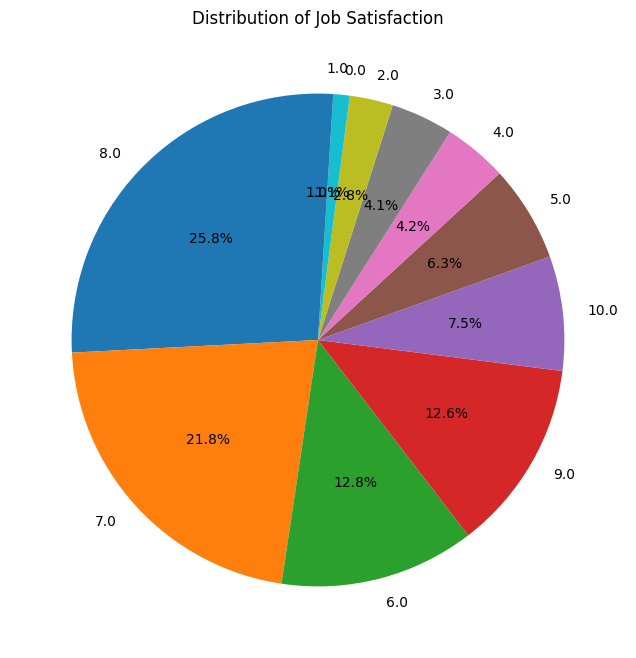


Interpretation of Job Satisfaction Distribution:
Minimum count of Job Satisfaction is 159 for 1.0
Maximum count of Job Satisfaction is 4150 for 8.0


In [42]:
# Visualize the distribution of JobSat
plt.figure(figsize=(8, 8))
df['JobSat'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Satisfaction')
plt.ylabel('') # Hide the default y-label
plt.show()

# Interpretation:
print("\nInterpretation of Job Satisfaction Distribution:")
print("Minimum count of Job Satisfaction is",df['JobSat'].value_counts().min(), "for", df['JobSat'].value_counts().idxmin())
print("Maximum count of Job Satisfaction is",df['JobSat'].value_counts().max(), "for", df['JobSat'].value_counts().idxmax())

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1200x800 with 0 Axes>

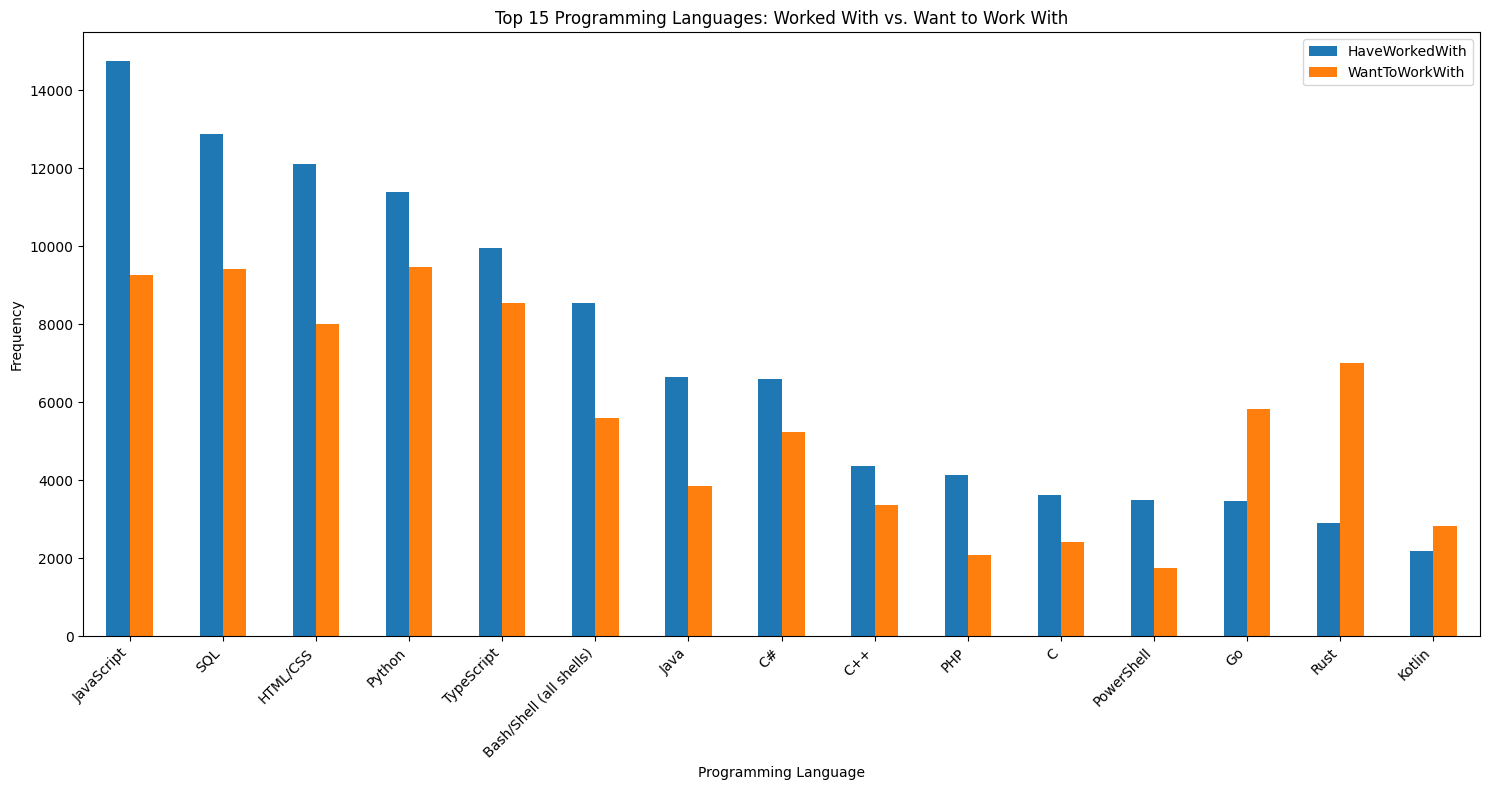

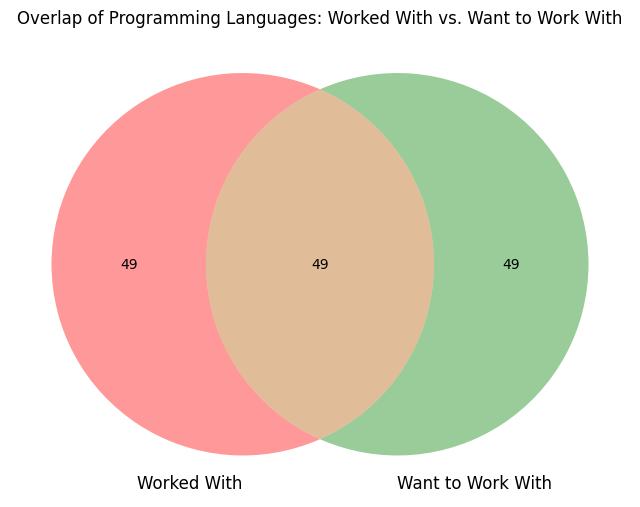

In [55]:
from matplotlib_venn import venn2

# Function to split and count languages
def count_languages(df, column):
    languages = df[column].str.split(';', expand=True).stack()
    return languages.value_counts()

# Get the frequency counts for both columns
languages_worked_with_counts = count_languages(df, 'LanguageHaveWorkedWith')
languages_want_to_work_with_counts = count_languages(df, 'LanguageWantToWorkWith')

# Combine the counts for plotting
combined_languages = pd.concat([languages_worked_with_counts, languages_want_to_work_with_counts], axis=1)
combined_languages.columns = ['HaveWorkedWith', 'WantToWorkWith']
combined_languages = combined_languages.fillna(0)

# Sort the combined data by 'HaveWorkedWith' for better visualization
combined_languages_sorted = combined_languages.sort_values(by='HaveWorkedWith', ascending=False)

# Select top N languages for plotting
top_n = 15
combined_languages_top = combined_languages_sorted.head(top_n)

# Grouped Bar Chart
plt.figure(figsize=(12, 8))
combined_languages_top.plot(kind='bar', figsize=(15, 8))
plt.title(f'Top {top_n} Programming Languages: Worked With vs. Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prepare data for Venn Diagram (focusing on the sets of languages, not frequency)
languages_worked_with_set = set(languages_worked_with_counts.index)
languages_want_to_work_with_set = set(languages_want_to_work_with_counts.index)

# Calculate set sizes
set1_size = len(languages_worked_with_set)
set2_size = len(languages_want_to_work_with_set)
intersection_size = len(languages_worked_with_set.intersection(languages_want_to_work_with_set))

# Venn Diagram
plt.figure(figsize=(8, 8))
venn2(subsets=(set1_size, set2_size, intersection_size), set_labels=('Worked With', 'Want to Work With'))
plt.title('Overlap of Programming Languages: Worked With vs. Want to Work With')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


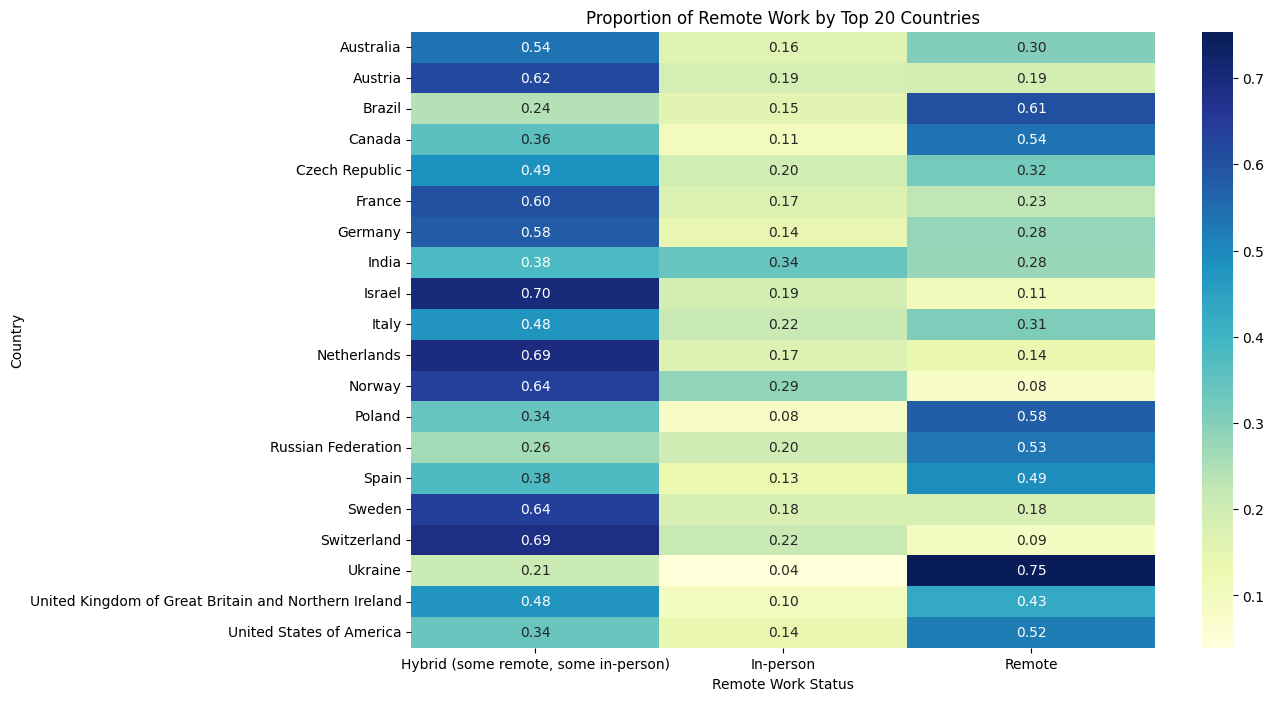

In [61]:
remote_work_by_country = df.groupby('Country')['RemoteWork'].value_counts(normalize=True).unstack().fillna(0)
# Heatmap (requires reshaping the data)
top_countries = df['Country'].value_counts().nlargest(20).index
remote_work_by_top_countries = df[df['Country'].isin(top_countries)].groupby('Country')['RemoteWork'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(remote_work_by_top_countries, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Proportion of Remote Work by Top 20 Countries')
plt.xlabel('Remote Work Status')
plt.ylabel('Country')
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [72]:
# Clean the 'YearsCodePro' column
# Replace 'Less than 1 year' with 0 and 'More than 50 years' with 51 for numerical conversion
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', '0')
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', '51')

# Convert 'YearsCodePro' to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
# Calculate the Pearson correlation coefficient between JobSat and YearsCodePro
correlation = df['JobSat'].corr(df['YearsCodePro'], method='pearson')

print(f"\nPearson correlation between JobSat and YearsCodePro: {correlation:.4f}")


Pearson correlation between JobSat and YearsCodePro: 0.1029


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.



Cross-tabulation of Top 10 Employment and EdLevel:
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                 567   
Employed, full-time;Employed, part-time                                               3   
Employed, full-time;Independent contractor, fre...                                   49   
Employed, full-time;Student, full-time                                               15   
Employed, full-time;Student, part-time                                               18   
Employed, part-time                                                                  12   
Independent contractor, freelancer, or self-emp...                                   44   
Independent contractor, freelancer, or self-emp...                                    5   
Student, full-time;Employed, part-time

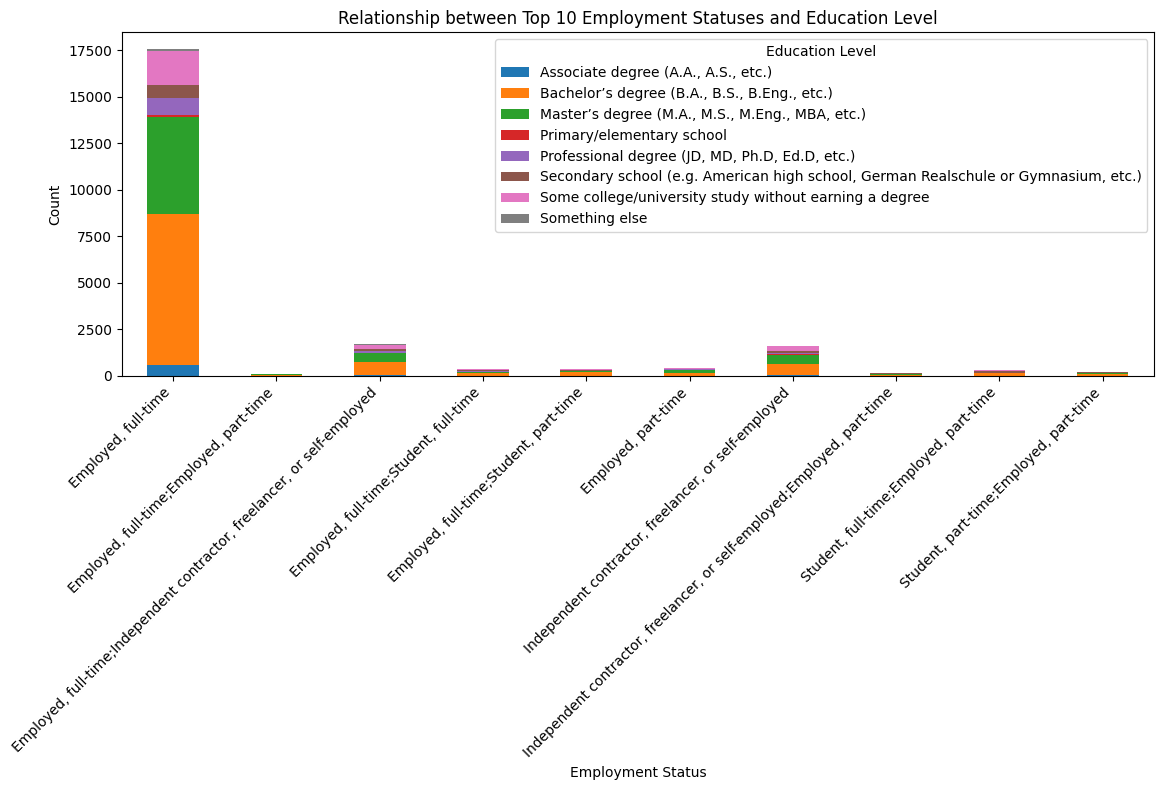

In [103]:
# Get the top 10 most frequent employment statuses
top_employment = df['Employment'].value_counts().head(10).index

# Filter the DataFrame to include only rows with these top employment statuses
df_top_employment = df[df['Employment'].isin(top_employment)]

# Create a cross-tabulation of the top employment statuses and EdLevel
employment_education_crosstab_top = pd.crosstab(df_top_employment['Employment'], df_top_employment['EdLevel'])

print("\nCross-tabulation of Top 10 Employment and EdLevel:")
print(employment_education_crosstab_top)

# Visualize the cross-tabulation using a stacked bar plot
employment_education_crosstab_top.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Top 10 Employment Statuses and Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [104]:
df.to_csv('cleaned_survey_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_survey_data.csv'")


Cleaned data saved to 'cleaned_survey_data.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.


In [20]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
